# Manejo de Datos Completos

### Limpieza de Datos

In [1]:
# Librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6
plt.style.use('ggplot')
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12

In [2]:
# Cargamos los datos
data = pd.read_csv("data/COVID19MEXICO2022.csv")

C:\Users\crish\AppData\Local\Temp\ipykernel_2420\3477270716.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/COVID19MEXICO2022.csv")


In [3]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-06-01,15ec76,1,12,5,2,5,5,35,1,...,2,2,97,1,1,3,99,México,97,97
1,2023-06-01,1ce5c6,2,6,9,2,9,9,10,2,...,2,2,97,1,2,7,99,México,97,2
2,2023-06-01,07e45f,1,6,12,1,12,12,29,1,...,2,2,97,2,97,6,99,México,97,97
3,2023-06-01,17d402,2,12,9,2,9,9,8,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-06-01,0a392b,1,12,7,1,7,7,19,1,...,2,2,97,2,97,6,99,México,97,97


In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451944 entries, 0 to 6451943
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [5]:
# Removemos columnas innecesarias
drop_columns = ["FECHA_ACTUALIZACION", "ID_REGISTRO", "ORIGEN", "SECTOR", "ENTIDAD_NAC", "ENTIDAD_UM", "MUNICIPIO_RES", "HABLA_LENGUA_INDIG", "TOMA_MUESTRA_LAB", "UCI", "PAIS_ORIGEN", "PAIS_NACIONALIDAD"]

data.drop(columns=drop_columns, inplace=True)
# Renombramos columnas a minúsculas
data.columns = [col.lower() for col in data.columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451944 entries, 0 to 6451943
Data columns (total 28 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   sexo                   int64 
 1   entidad_res            int64 
 2   tipo_paciente          int64 
 3   fecha_ingreso          object
 4   fecha_sintomas         object
 5   fecha_def              object
 6   intubado               int64 
 7   neumonia               int64 
 8   edad                   int64 
 9   nacionalidad           int64 
 10  embarazo               int64 
 11  indigena               int64 
 12  diabetes               int64 
 13  epoc                   int64 
 14  asma                   int64 
 15  inmusupr               int64 
 16  hipertension           int64 
 17  otra_com               int64 
 18  cardiovascular         int64 
 19  obesidad               int64 
 20  renal_cronica          int64 
 21  tabaquismo             int64 
 22  otro_caso              int64 
 23  resulta

In [7]:
# Ponemos el tipo de dato correcto
no_date_cols = ['sexo', 'tipo_paciente', 'intubado', 'neumonia', 'edad',
       'nacionalidad', 'embarazo', 'indigena', 'diabetes', 'epoc', 'asma',
       'inmusupr', 'hipertension', 'otra_com', 'cardiovascular', 'obesidad',
       'renal_cronica', 'tabaquismo', 'otro_caso', 'resultado_lab',
       'toma_muestra_antigeno', 'resultado_antigeno', 'clasificacion_final',
       'migrante']

data[no_date_cols] = data[no_date_cols].astype('int8')

In [8]:
data.head()

,sexo,entidad_res,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,intubado,neumonia,edad,nacionalidad,...,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante
0,2,5,1,2022-01-11,2022-01-08,9999-99-99,97,2,26,1,...,2,2,2,2,2,97,1,1,3,99
1,2,9,2,2022-02-02,2022-02-02,9999-99-99,2,2,70,1,...,2,2,2,2,2,97,1,2,7,99
2,1,12,1,2022-03-20,2022-03-15,9999-99-99,97,2,82,1,...,2,2,2,2,2,97,2,97,6,99
3,2,9,1,2022-06-25,2022-06-23,9999-99-99,97,2,25,1,...,2,2,2,2,2,97,1,2,7,99
4,1,7,1,2022-08-23,2022-08-21,9999-99-99,97,2,36,1,...,2,2,2,2,2,97,2,97,6,99


In [9]:
data['fecha_sintomas'] = pd.to_datetime(data['fecha_sintomas'], format='%Y-%m-%d', errors='coerce')
data['fecha_ingreso'] = pd.to_datetime(data['fecha_ingreso'], format='%Y-%m-%d', errors='coerce')
data['fecha_def'] = pd.to_datetime(data['fecha_def'], format='%Y-%m-%d', errors='coerce')

data["entidad_res"] = data["entidad_res"].astype("category")

In [10]:
data.head()

,sexo,entidad_res,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,intubado,neumonia,edad,nacionalidad,...,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante
0,2,5,1,2022-01-11,2022-01-08,NaT,97,2,26,1,...,2,2,2,2,2,97,1,1,3,99
1,2,9,2,2022-02-02,2022-02-02,NaT,2,2,70,1,...,2,2,2,2,2,97,1,2,7,99
2,1,12,1,2022-03-20,2022-03-15,NaT,97,2,82,1,...,2,2,2,2,2,97,2,97,6,99
3,2,9,1,2022-06-25,2022-06-23,NaT,97,2,25,1,...,2,2,2,2,2,97,1,2,7,99
4,1,7,1,2022-08-23,2022-08-21,NaT,97,2,36,1,...,2,2,2,2,2,97,2,97,6,99


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451944 entries, 0 to 6451943
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   sexo                   int8          
 1   entidad_res            category      
 2   tipo_paciente          int8          
 3   fecha_ingreso          datetime64[ns]
 4   fecha_sintomas         datetime64[ns]
 5   fecha_def              datetime64[ns]
 6   intubado               int8          
 7   neumonia               int8          
 8   edad                   int8          
 9   nacionalidad           int8          
 10  embarazo               int8          
 11  indigena               int8          
 12  diabetes               int8          
 13  epoc                   int8          
 14  asma                   int8          
 15  inmusupr               int8          
 16  hipertension           int8          
 17  otra_com               int8          
 18  cardiovascular        

In [12]:
# Subconjunto de datos para análisis cuando el resultado de clasificación final
# es 1 , 2 o 3
# 1: Caso confirmado por nexo epidemiológico
# 2: Caso confirmado por comite clínico
# 3: Caso confirmado por laboratorio
data = data[(data['clasificacion_final'] == 1) | (data['clasificacion_final'] == 2) | (data['clasificacion_final'] == 3)]
# Cambiamos el nombre de la columna clasificacion_final a clasificacion
data.rename(columns={'clasificacion_final': 'clasificacion'}, inplace=True)

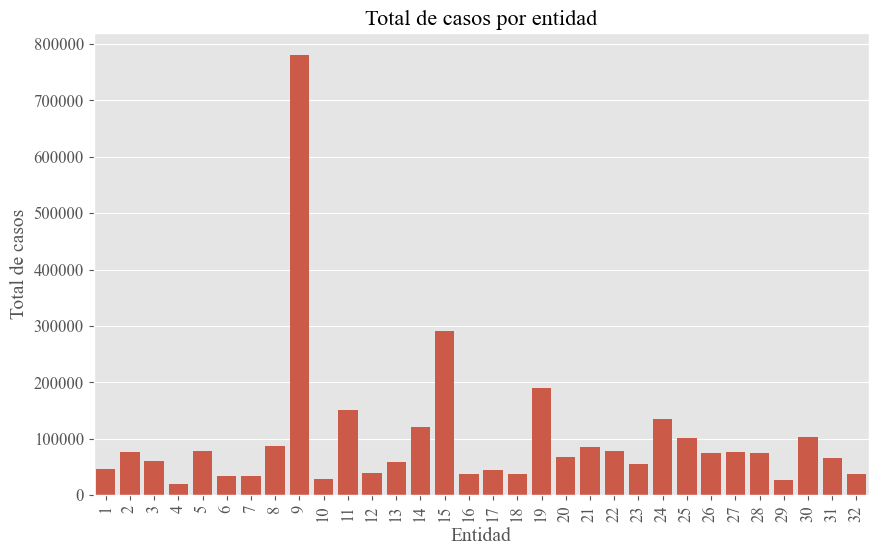

In [13]:
# Datos por entidad
entidad = data['entidad_res'].value_counts().reset_index()
entidad.columns = ['entidad', 'total']
entidad['entidad'] = entidad['entidad'].astype('int8')

entidad.sort_values(by='total', ascending=False, inplace=True)
# Graficamos los datos
sn.barplot(x='entidad', y='total', data=entidad)
plt.title('Total de casos por entidad')
plt.xlabel('Entidad')
plt.ylabel('Total de casos')
plt.xticks(rotation=90)
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3195409 entries, 0 to 6451942
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   sexo                   int8          
 1   entidad_res            category      
 2   tipo_paciente          int8          
 3   fecha_ingreso          datetime64[ns]
 4   fecha_sintomas         datetime64[ns]
 5   fecha_def              datetime64[ns]
 6   intubado               int8          
 7   neumonia               int8          
 8   edad                   int8          
 9   nacionalidad           int8          
 10  embarazo               int8          
 11  indigena               int8          
 12  diabetes               int8          
 13  epoc                   int8          
 14  asma                   int8          
 15  inmusupr               int8          
 16  hipertension           int8          
 17  otra_com               int8          
 18  cardiovascular         int8

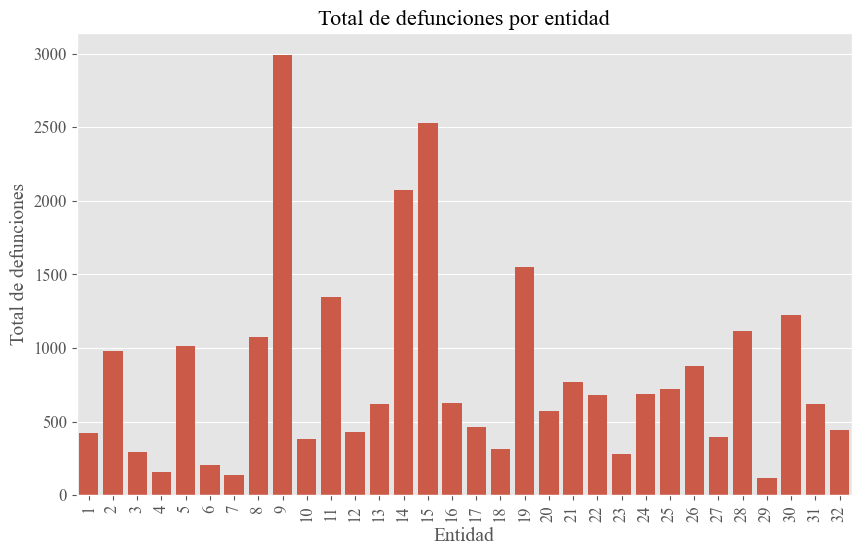

In [15]:
# Contamos el número de defunciones
# Defunciones son quellas que tienen fecha de defuncion

defunciones = data[data['fecha_def'].notnull()]

# Contamos el número de defunciones por entidad
defunciones_entidad = defunciones['entidad_res'].value_counts().reset_index()
defunciones_entidad.columns = ['entidad', 'total']
defunciones_entidad['entidad'] = defunciones_entidad['entidad'].astype('int8')
defunciones_entidad.sort_values(by='total', ascending=False, inplace=True)

# Graficamos los datos
sn.barplot(x='entidad', y='total', data=defunciones_entidad)
plt.title('Total de defunciones por entidad')
plt.xlabel('Entidad')
plt.ylabel('Total de defunciones')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Definimos si una persona murio

data['defuncion'] = data['fecha_def'].notnull().astype('int8')


In [17]:
data.head()

,sexo,entidad_res,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,intubado,neumonia,edad,nacionalidad,...,obesidad,renal_cronica,tabaquismo,otro_caso,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion,migrante,defuncion
0,2,5,1,2022-01-11,2022-01-08,NaT,97,2,26,1,...,2,2,2,2,97,1,1,3,99,0
5,1,1,1,2022-07-21,2022-07-14,NaT,97,2,44,1,...,2,2,2,2,1,2,97,3,99,0
7,2,9,1,2022-12-23,2022-12-23,NaT,97,2,73,1,...,2,2,2,2,97,1,1,3,99,0
10,1,9,1,2022-01-01,2022-01-01,NaT,97,2,37,1,...,98,98,98,99,97,1,1,3,99,0
14,1,32,1,2022-08-09,2022-08-07,NaT,97,2,29,1,...,2,2,2,2,2,1,1,3,99,0


In [18]:
# Vemos la proporción de defunciones
n_def = data['defuncion'].sum()
n_total = data.shape[0]
n_proporcion = n_def / n_total
print(f"Total de defunciones: {n_def}")
print(f"Total de casos: {n_total}")
print(f"Proporción de defunciones: {n_proporcion:.2%}")

Total de defunciones: 26108
Total de casos: 3195409
Proporción de defunciones: 0.82%


In [24]:
# Definir el número de muestreados
n_defunciones = 2610
n_censurados = n_defunciones * 8
print(f"Total de muestreados: {n_defunciones + n_censurados:.0f}")
print(f"Total de defunciones: {n_defunciones:.0f}")
print(f"Total de censurados: {n_censurados:.0f}")

Total de muestreados: 23490
Total de defunciones: 2610
Total de censurados: 20880


In [25]:
# Muestreo estratificado
df_def = data[data['defuncion'] == 1].sample(n=n_defunciones, random_state=1542)
df_cens = data[data['defuncion'] == 0].sample(n=n_censurados, random_state=9123756)

df_muestra = pd.concat([df_def, df_cens])

print(df_muestra['defuncion'].value_counts())

defuncion
0    20880
1     2610
Name: count, dtype: int64


In [26]:
#data.to_csv("data/COVID19MEXICO2022_clean.csv", index=False)
df_muestra.to_csv("COVID19MEXICO2022_muestra.csv", index=False)